# CS 7641 Machine Learning - Assignment 4 Markov Decision Processes

student: Xinru Lu - xlu320 - xlu320@gatech.edu

The repository is accessible at: https://github.com/Lorraine97/ML_2022/tree/main/project_1

## 1. Abstract

This assignment will focus on 2 MDP problems, and explore options of value iteration, policy iteration and reinforcement learning to solve the two problems.

## 2. Introduction

The 2 MDP problems to be studied are the following:
- [Forest Fire](https://pymdptoolbox.readthedocs.io/en/latest/api/example.html#mdptoolbox.example.forest)
- [Frozen Lake](https://www.gymlibrary.dev/environments/toy_text/frozen_lake/)

And I will utilize the implemented package to run the iterations:
- [Policy Iteration](https://pymdptoolbox.readthedocs.io/en/latest/api/mdp.html#mdptoolbox.mdp.PolicyIteration)
- [Value Iteration](https://pymdptoolbox.readthedocs.io/en/latest/api/mdp.html#mdptoolbox.mdp.ValueIteration)

And lastly, I will apply [Q-learning algorithm](https://pymdptoolbox.readthedocs.io/en/latest/api/mdp.html#mdptoolbox.mdp.QLearning) to solve these two problem. 

In [1]:
# import functions written to visualize/display results

import pandas as pd
from hiive.mdptoolbox import mdp
from run import run_forest, run_lake, compare_policy, q_learning_forest, q_learning_lake

## 3. Forest Fire Problem

The considered problem is to manage a forest stand with first the objective to maintain an old forest for wildlife and second to make money selling cut wood. The forest stand is managed by two possible actions: Wait or Cut. An action is decided and applied each time period of 20 years at the beginning
of the period. Three states are defined, corresponding to 3 age-class of trees: age-class 0-20 years (state 1), 21-40 years (state 2), more than 40 years (state 3). The state 3 correspond to the oldest age-class. At the end of a period t, if the state was s at t and action Wait is chosen, the state at the next time period will be min(s + 1, 3) if no fire occurred. But there is a probability p that a fire burns the forest after the application of the action, living the stand at 3 the youngest age-class (state 1). Let p = 0.1 be the probability of wildfire
occurrence during a time period. The problem is how to manage this stand in a long term vision to maximize the γ-discounted reward with γ = 0.6 and 0.9 (we will try different discount values in the experiment).

(Adapted from the documentation site: [Forest Fire](https://pymdptoolbox.readthedocs.io/en/latest/api/example.html#mdptoolbox.example.forest))

With the `mdptoolbox.example.forest` function, we get a MDP example based on a simple forest management scenario. This function is used to generate a transition probability $(A × S × S)$ array `P` and a reward $(S × A)$ matrix `R` that model the following problem. A forest is managed by two actions: ‘Wait’ and ‘Cut’. An action is decided each year with first the objective to maintain an old forest for wildlife and second to make money selling cut wood. Each year there is a probability `p` that a fire burns the forest.

Here is how the problem is modeled. Let ${0, 1 . . . S-1 }$ be the states of the forest, with $S-1$ being the oldest. Let ‘Wait’ be action 0 and ‘Cut’ be action 1. After a fire, the forest is in the youngest state, that is state 0. The transition matrix `P` and the reward matrix `R` of the problem can then be defined as follows:

In [ ]:
           | p 1-p 0.......0  |
           | .  0 1-p 0....0  |
P[0,:,:] = | .  .  0  .       |
           | .  .        .    |
           | .  .         1-p |
           | p  0  0....0 1-p |


           | 1 0..........0 |
           | . .          . |
P[1,:,:] = | . .          . |
           | . .          . |
           | . .          . |
           | 1 0..........0 |

In [ ]:
         |  0  |
         |  .  |
R[:,0] = |  .  |
         |  .  |
         |  0  |
         |  r1 |

         |  0  |
         |  1  |
R[:,1] = |  .  |
         |  .  |
         |  1  |
         |  r2 |

Some parameters of the MDP algorithm:
- epislon: set to be 0.01; it is the stopping criterion. The maximum change in the value function at each iteration is compared against epsilon. Once the change falls below this value, then the value function is considered to have **converged** to the optimal value function.
- discount: Discount factor. Values [0.6, 0.8, 0.99] are run to compare.

Some customized parameters of the FF problem:

- S: The number of states; small state problem is set for 3, and large for 1000

Some default parameters of the FF problem:

- r1 : The reward when the forest is in its oldest state and action ‘Wait’ is performed. Default: 4.
- r2 : The reward when the forest is in its oldest state and action ‘Cut’ is performed. Default: 2.
- p : The probability of wild fire occurence, in the range [0, 1]. Default: 0.1.

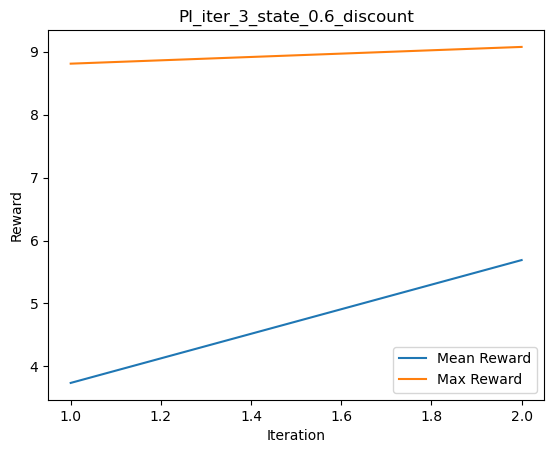

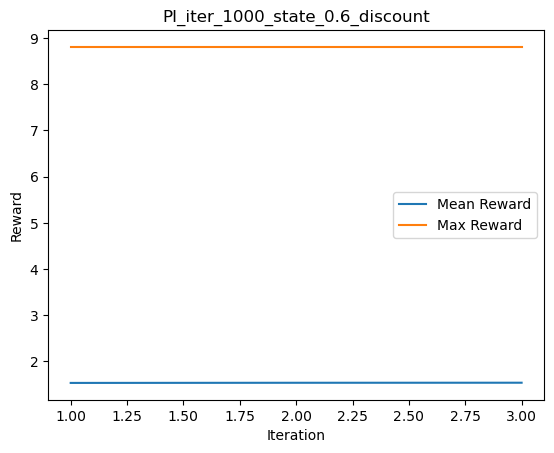

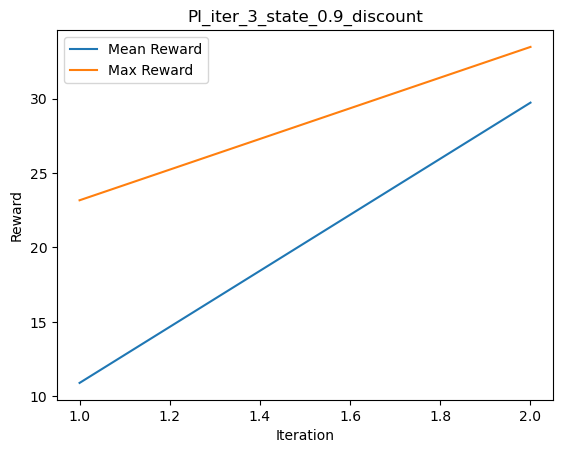

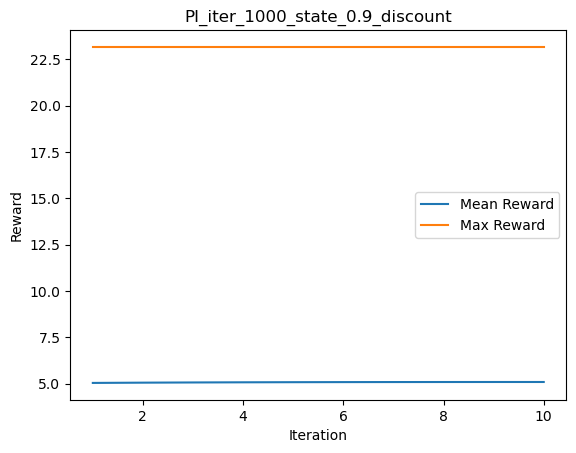

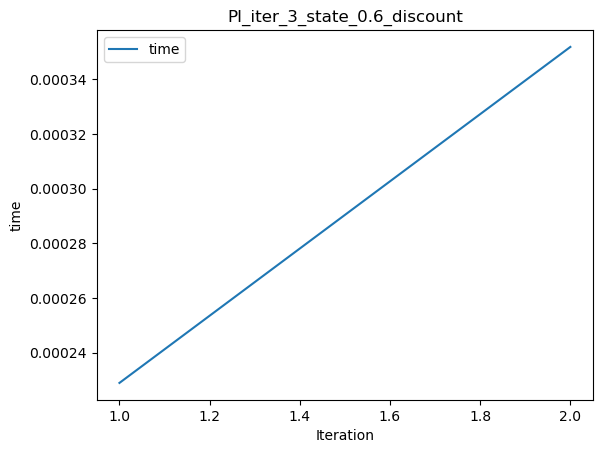

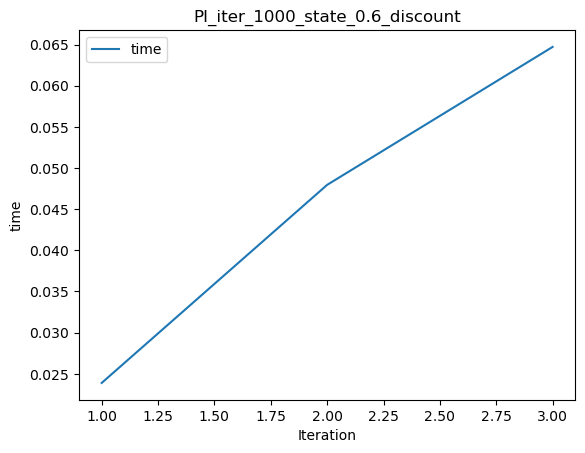

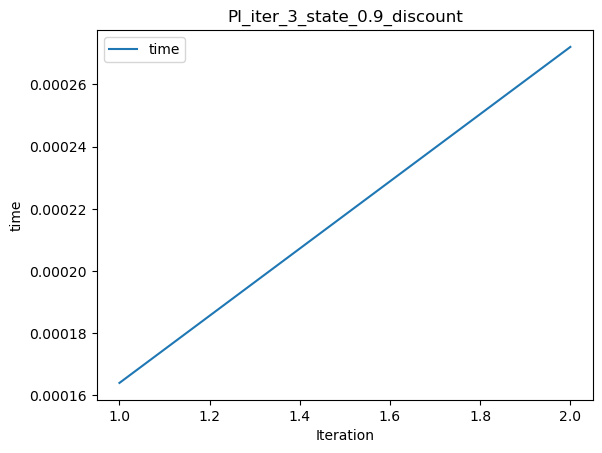

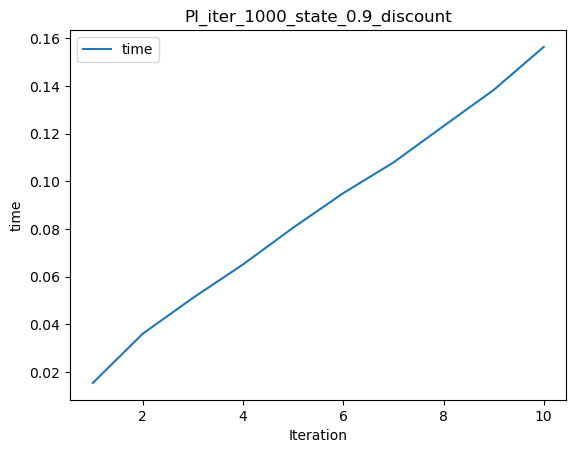

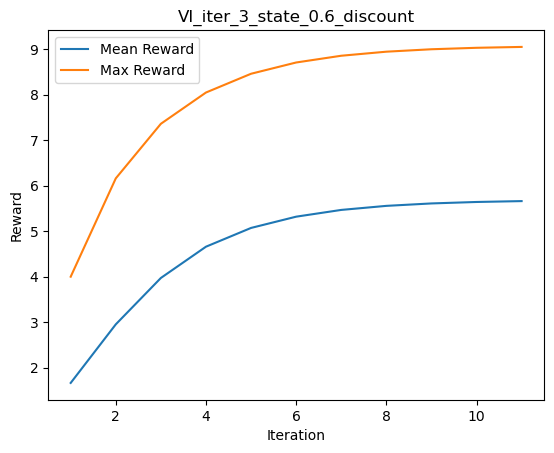

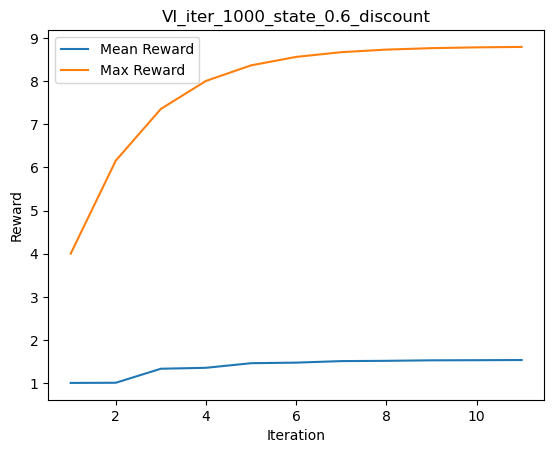

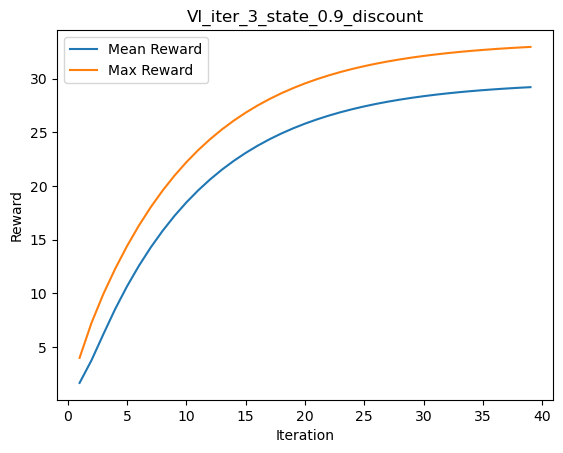

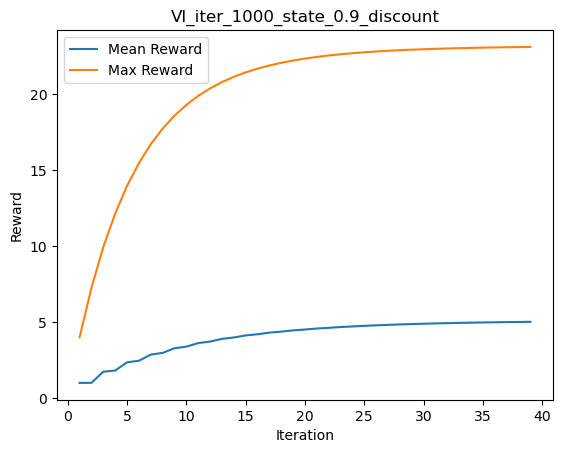

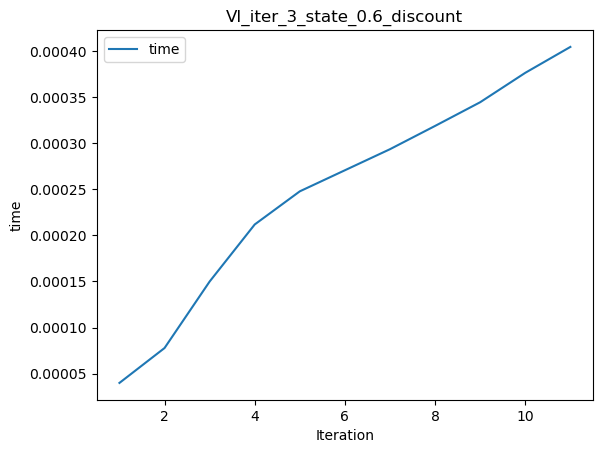

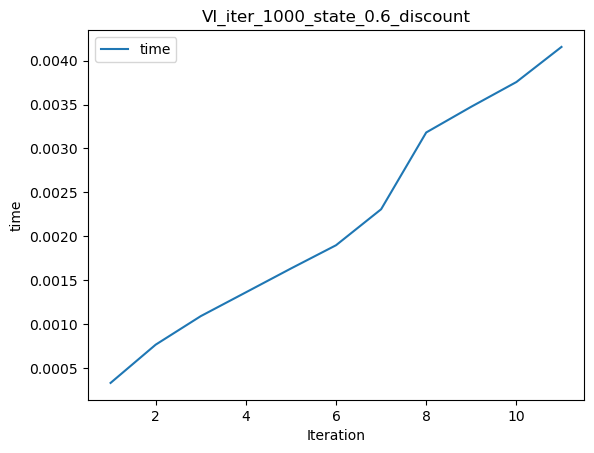

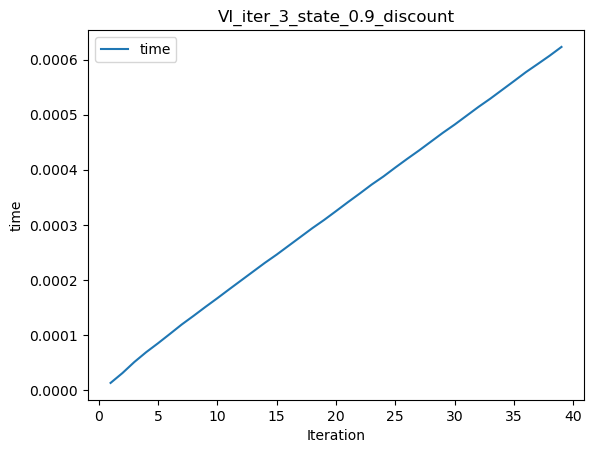

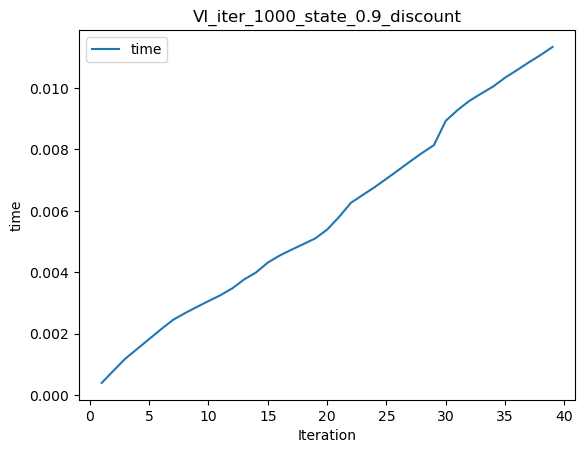

In [1]:
states = [3, 1000]
discounts = [0.6, 0.9]

# PI
fm_policy_iteration = lambda dict_args: mdp.PolicyIteration(**dict_args)
fm_policy_iteration_results = run_forest(fm_policy_iteration, states, discounts, "PI")

# VI
fm_value_iteration = lambda dict_args: mdp.ValueIteration(**dict_args)
fm_value_iteration_results = run_forest(fm_value_iteration, states, discounts, "VI")

In [14]:
pd.DataFrame(
    {"exp_name": [e['exp_name'] for e in fm_policy_iteration_results],
     "rewards": [e['run_stats'][-1]['Reward'] for e in fm_policy_iteration_results],
     "iter": [e['iterations'] for e in fm_policy_iteration_results],
     "time": [e['run_stats'][-1]['Time'] for e in fm_policy_iteration_results],
    }
)

,exp_name,rewards,iter,time
0,PI_iter_3_state_0.6_discount,9.076000,2,0.000352
1,PI_iter_1000_state_0.6_discount,8.809994,3,0.064708
2,PI_iter_3_state_0.9_discount,33.484000,2,0.000272
3,PI_iter_1000_state_0.9_discount,23.172434,10,0.156365


In [13]:
pd.DataFrame(
    {"exp_name": [e['exp_name'] for e in fm_value_iteration_results],
     "rewards": [e['run_stats'][-1]['Reward'] for e in fm_value_iteration_results],
     "iter": [e['iterations'] for e in fm_value_iteration_results],
     "time": [e['run_stats'][-1]['Time'] for e in fm_value_iteration_results],
    }
)

,exp_name,rewards,iter,time
0,VI_iter_3_state_0.6_discount,9.047158,11,0.000405
1,VI_iter_1000_state_0.6_discount,8.797055,11,0.004157
2,VI_iter_3_state_0.9_discount,32.953531,39,0.000623
3,VI_iter_1000_state_0.9_discount,23.089675,39,0.011341


In [4]:
compare_policy(fm_value_iteration_results, fm_policy_iteration_results, 'num_states')

{'3_0.6': True, '1000_0.6': True, '3_0.9': True, '1000_0.9': True}

From the above plots, we can observe that with different discount values and state sizes, the problem converge at different iterations with a slightly different reward values. 

At state size of 3, the rewards varies largely on different discount values (0.6 vs. 0.9), for both Policy Iteration method and Value Iteration method. At discount value of 0.6, it converges to reward value of around 9, while at discount rate of 0.9, it converges to reward value of around 33 for both PI and VI. They both converge at the second iteration for PI method, while for VI method, the convergence happens at very different iterations, at 10 and 40 respectively for value 0.6 and 0.9. As a result, we can conclude that for PI, the different reward value was not due to different number of iterations, but rather because the cumulative rewards decay much slower with a low discount value (0.6 is a higher discount than 0.9). For VI, however, it might be a result from both higher iterations (since there is no punishment, or negative reward in the forest fire problem). In terms of time complexity, they both seem to be linear with the iteration numbers, with a lightly more time spent on each iteration for discount value - 0.9 than 0.6.

Similarly, at state size of 1000, the rewards also varies largely on different discount values (0.6 vs. 0.9), for both Policy Iteration method and Value Iteration method. For PI method, it converges at iteration 3 and 10, while for VI method, the convergence happens at 10 and 40, respectively for value 0.6 and 0.9. The converged rewards for both iteration methods are very similar, just like what happened with the small state size problem. We also observe that compared to the problem with state size of 3, the final rewards value are very similar when the discount rate is high (0.6). In terms of time complexity, they both seem to be linear with the iteration numbers.

Overall, for forest file problem, value iteration method seems to converge faster than policy iteration method in terms of processing time; although policy iteration method converges at a smaller number of iterations, for each iteration, the processing time takes longer.

Comparing the problems with different state sizes, we notice that at the same discount value, their rewards are surprisingly quite close. Especially when observing that they both converge at the same iteration step, the fact that their rewards value are similar starts to make sense. It seems that the in this problem without negative reward value, the convergence rate is similar for problems with very different state size. However, discount rate still has a significant impact on the convergence rate here.

Lastly, it appears that PI and VI methods have the same outcome policies, which is what we normally expect when the algorithm converges.

## 4. Frozen Lake Problem

With the `gym.make("FrozenLake-v1")` function, we get a simple grid world MDP example. The problem is about crossing a frozen lake from Start(S) to Goal(G) without falling into any Holes(H) by walking over the Frozen(F) lake. It is stochastic, as the agent may not always move in the intended direction due to the slippery nature of the frozen lake.

- Action Space: The agent takes a 1-element vector for actions. The action space is (dir), where dir decides direction to move in which can be:
    - 0: LEFT
    - 1: DOWN
    - 2: RIGHT
    - 3: UP

- Observation Space: The observation is a value representing the agent’s current position as $current\_row * nrows + current\_col$ (where both the row and col start at 0). For example, the goal position in the 4x4 map can be calculated as follows: $3 * 4 + 3 = 15$. The number of possible observations is dependent on the size of the map. For example, the 4x4 map has 16 possible observations.

- Reward schedule:
    - Reach goal(G): +1
    - Reach hole(H): 0
    - Reach frozen(F): 0

0.6 3
0.6 50
0.9 3
0.9 50


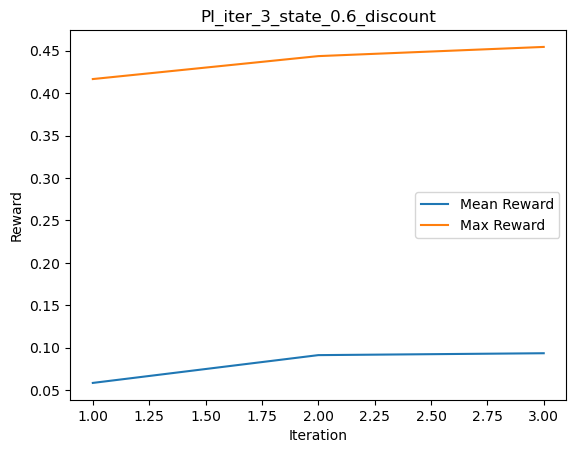

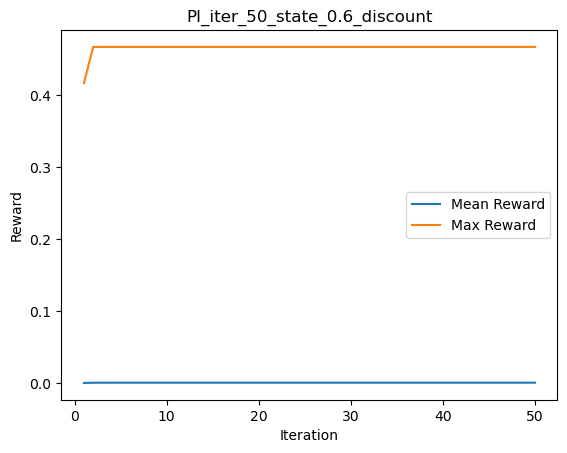

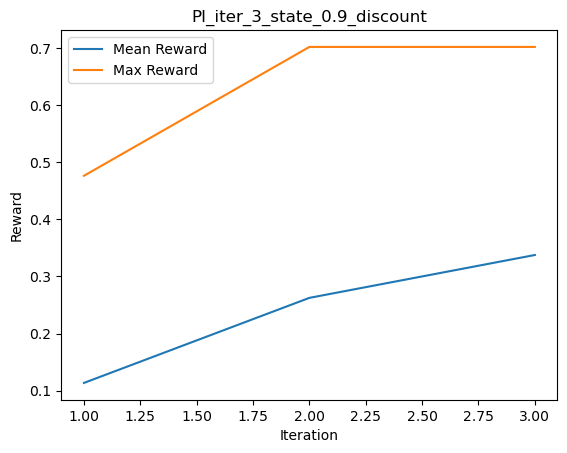

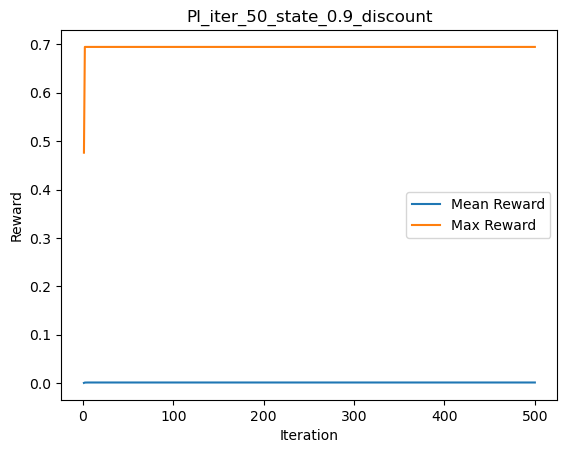

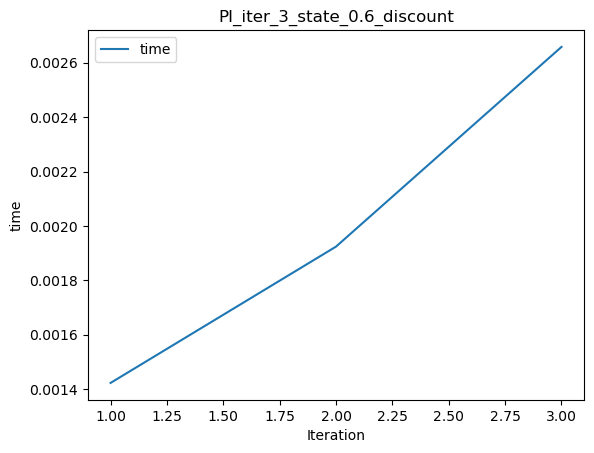

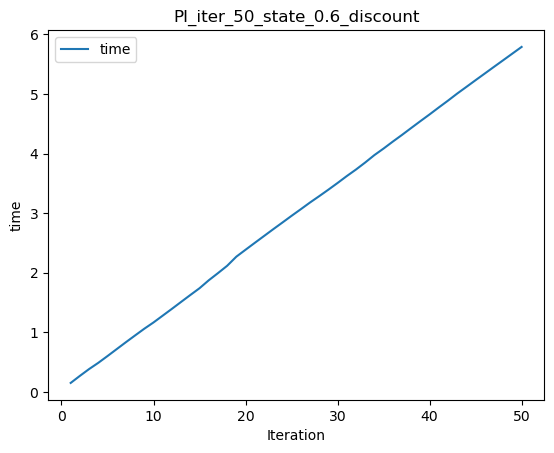

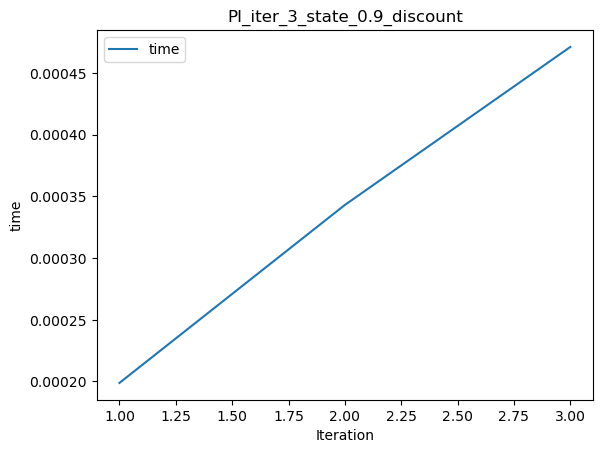

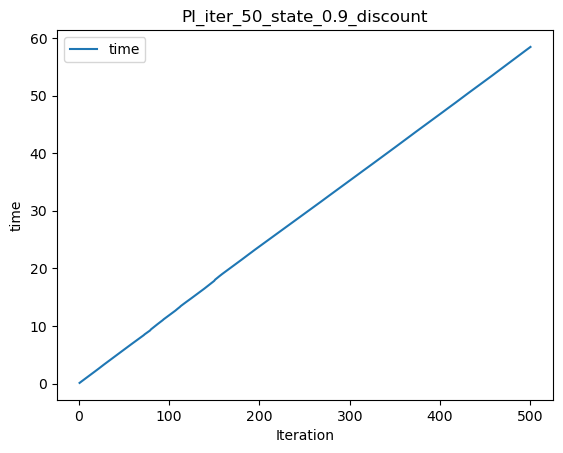

0.6 3
0.6 50
0.9 3
0.9 50


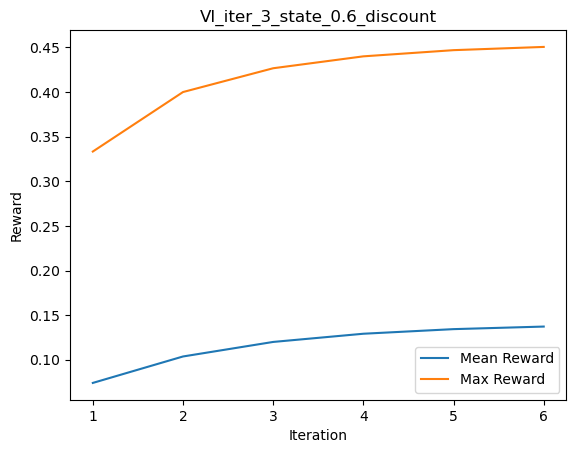

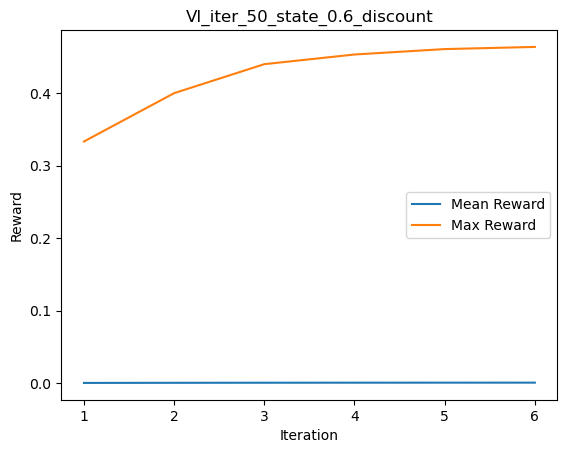

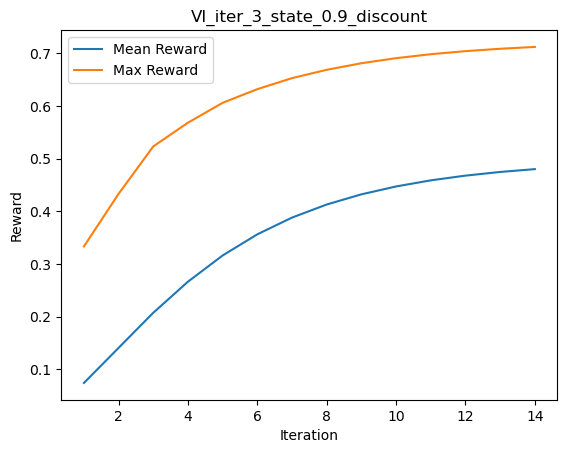

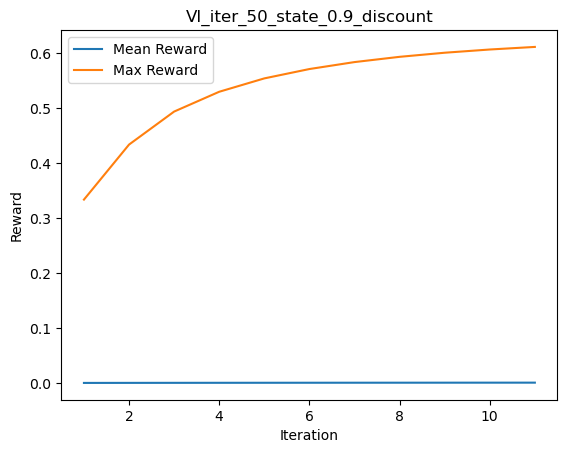

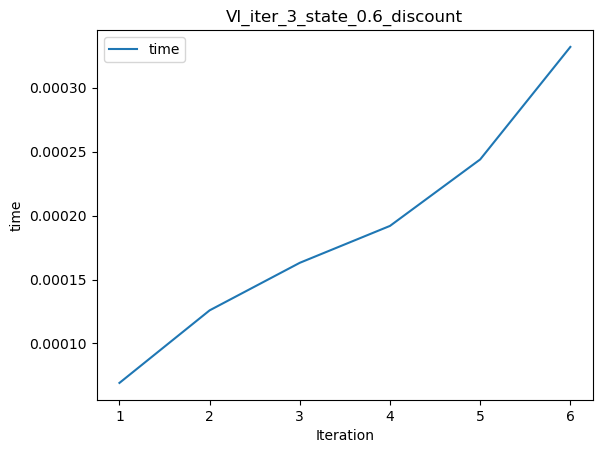

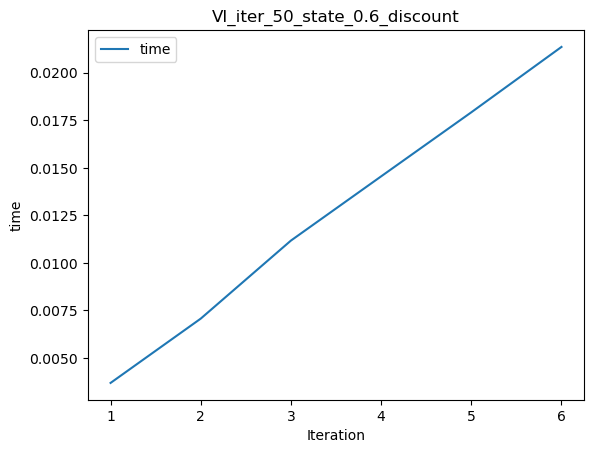

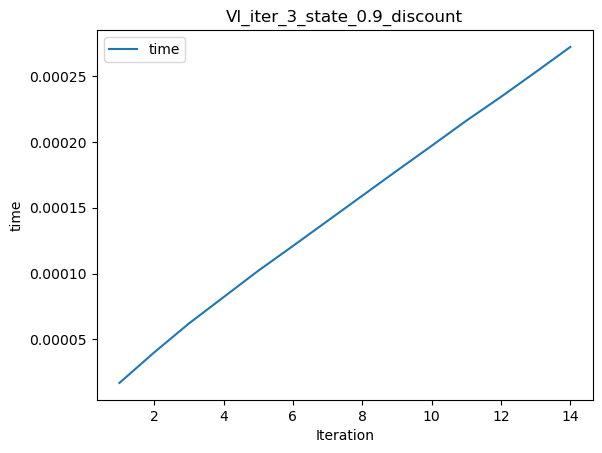

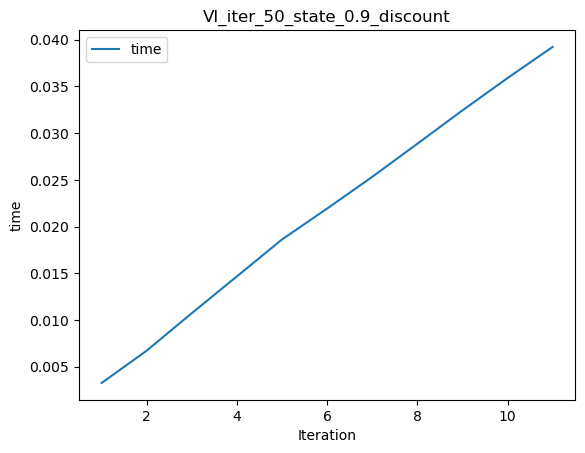

In [5]:
sizes = [3, 50]
discounts = [0.6, 0.9]

# PI
fl_policy_iteration = lambda dict_args: mdp.PolicyIteration(**dict_args)
fl_policy_iteration_results = run_lake(fl_policy_iteration, sizes, discounts, "PI")

# VI
fl_value_iteration = lambda dict_args: mdp.ValueIteration(**dict_args)
fl_value_iteration_results = run_lake(fl_value_iteration, sizes, discounts, "VI")

In [11]:
pd.DataFrame(
    {"exp_name": [e['exp_name'] for e in fl_policy_iteration_results],
     "rewards": [e['run_stats'][-1]['Reward'] for e in fl_policy_iteration_results],
     "iter": [e['iterations'] for e in fl_policy_iteration_results],
     "time": [e['run_stats'][-1]['Time'] for e in fl_policy_iteration_results],
    }
)

,exp_name,rewards,iter,time
0,PI_iter_3_state_0.6_discount,0.454545,3,0.002658
1,PI_iter_50_state_0.6_discount,0.467060,50,5.788285
2,PI_iter_3_state_0.9_discount,0.701754,3,0.000471
3,PI_iter_50_state_0.9_discount,0.694684,500,58.455127


In [12]:
pd.DataFrame(
    {"exp_name": [e['exp_name'] for e in fl_value_iteration_results],
     "rewards": [e['run_stats'][-1]['Reward'] for e in fl_value_iteration_results],
     "iter": [e['iterations'] for e in fl_value_iteration_results],
     "time": [e['run_stats'][-1]['Time'] for e in fl_value_iteration_results],
    }
)

,exp_name,rewards,iter,time
0,VI_iter_3_state_0.6_discount,0.450560,6,0.000332
1,VI_iter_50_state_0.6_discount,0.463787,6,0.021355
2,VI_iter_3_state_0.9_discount,0.712211,14,0.000272
3,VI_iter_50_state_0.9_discount,0.610836,11,0.039236


In [174]:
compare_policy(fl_value_iteration_results, fl_policy_iteration_results)

{'3_0.6': False, '80_0.6': False, '3_0.9': False, '80_0.9': False}

From the above plots, we can observe that with different discount values and state sizes, the problem converge at different iterations with a slightly different reward values. 

At grid size of 3x3, the rewards varies largely on different discount values (0.6 vs. 0.9), for both Policy Iteration method and Value Iteration method. At different discount values, it both converge at the third iteration for PI. For VI, however, it converges at 6 and 14 iterations for discount value 0.6 and 0.9 respectively. In terms of the converged reward value, for both PI and VI, at discount rate 0.6, it converges to around 0.45, while at discount rate 0.9, it converges to around 0.7. In terms of time complexity, they both seem to be linear with the iteration numbers, with a lightly more time spent on each iteration for discount value 0.6 than 0.9 (this is different from what we observed in forest fire problem).

Similarly, at state size of 50x50, the rewards also varies largely on different discount values (0.6 vs. 0.9), for both Policy Iteration method and Value Iteration method. For PI method, it converges at iteration 50 and 500 (which could mean that it didn't converge until timeout), while for VI method, the convergence happens at 6 and 11, respectively for value 0.6 and 0.9. The converged rewards for both iteration methods are very similar, just like what happened with the small state size problem. We also observe that compared to the problem with state size of 3, the final rewards value are very similar when the discount rate is high (0.6). In terms of time complexity, they both seem to be linear with the iteration numbers.

Overall, for frozen lake problem, value iteration method seems to converge faster than policy iteration method, at both faster iteration and faster processing time for each iteration.

In general, we observed quite similar pattern in the frozen lake problem, compared with the forest fire problem. However, one thing that stands out is that the policy iteration did not converge within 500 iterations. Although policy iteration is known to guarantee convergence, it is consuming more than expected time to run through the problem.

Lastly, it appears that PI and VI methods have different outcomes for policy in the Frozen Lake problem, which is a bit strange. It could be that before they reach actual convergence, it stopped to show significant reward increase (less than epsilon value) so that the algorithm decides to converge there. It seems that both method worked more reliably (in terms of converged solution) for the forest fire problem, and in order to make it work as well for the frozen lake problem, more tuning is needed.

## 3. Q Learning Algorithm

Here, we will use Q Learning to solve the above two MDP problems.

Q-learning is a model-free reinforcement learning algorithm to learn the value of an action in a particular state. It does not require a model of the environment (hence "model-free"), and it can handle problems with stochastic transitions and rewards without requiring adaptations. (from [Wiki](https://en.wikipedia.org/wiki/Q-learning))

### 3.1 Forest Fire with Q Learning Algorithm

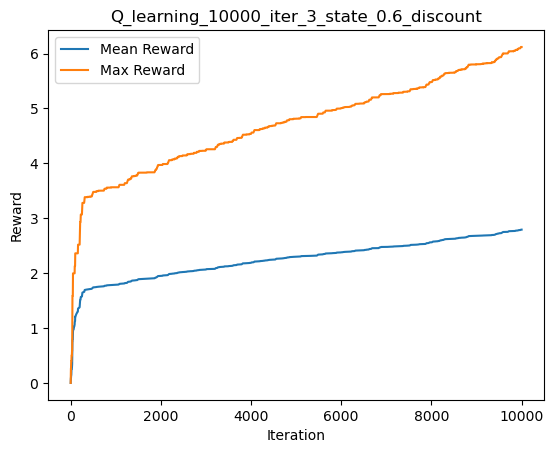

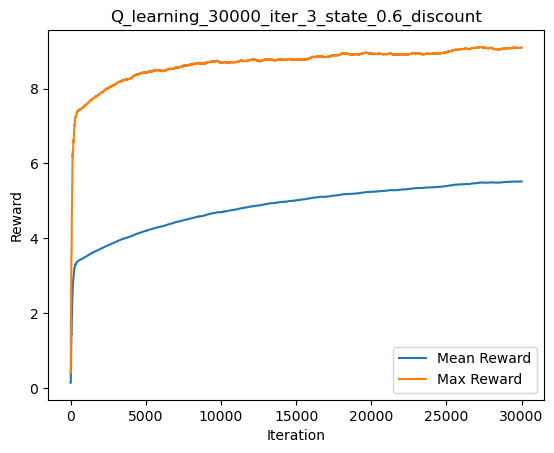

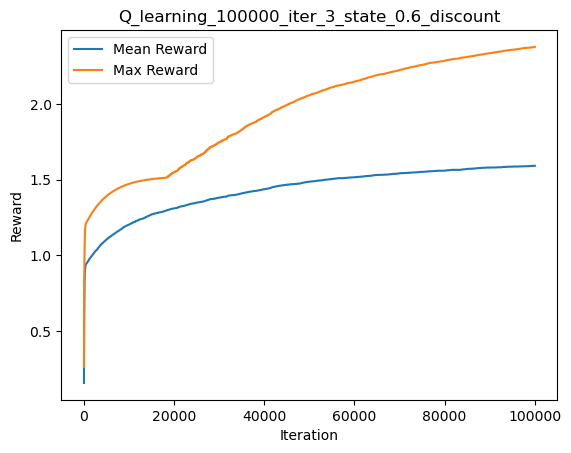

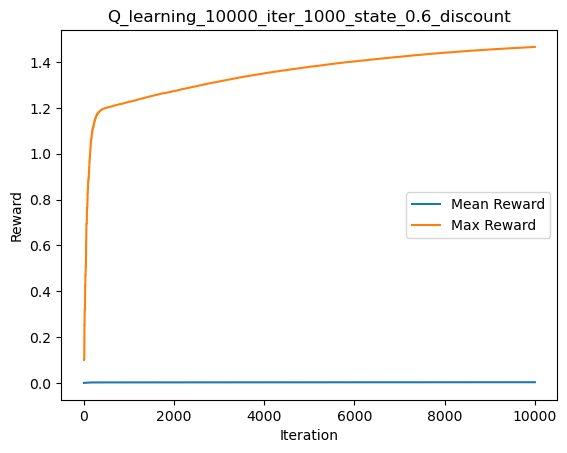

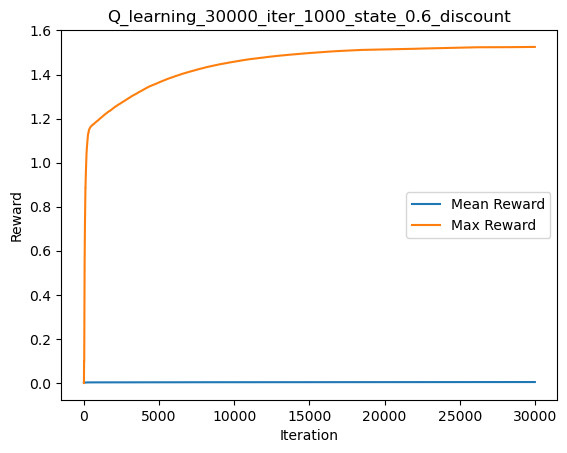

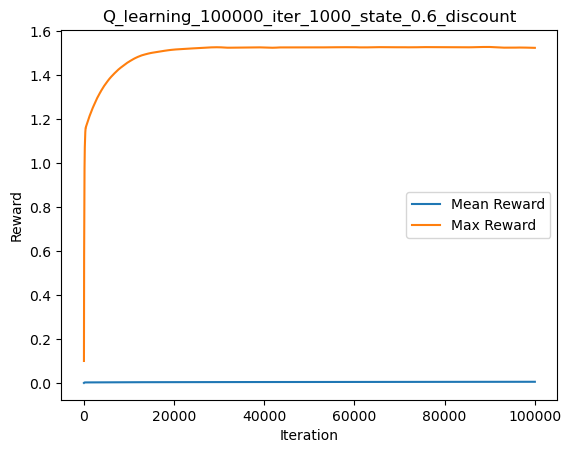

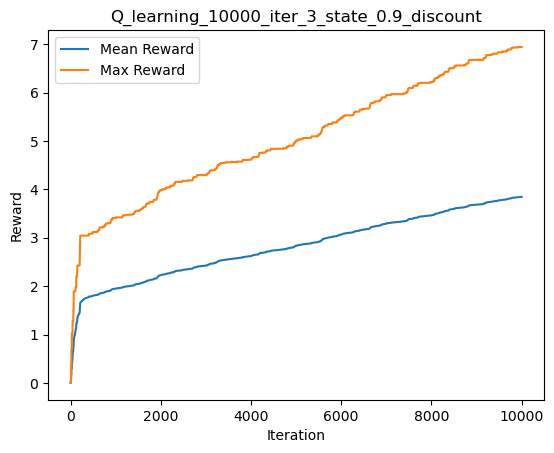

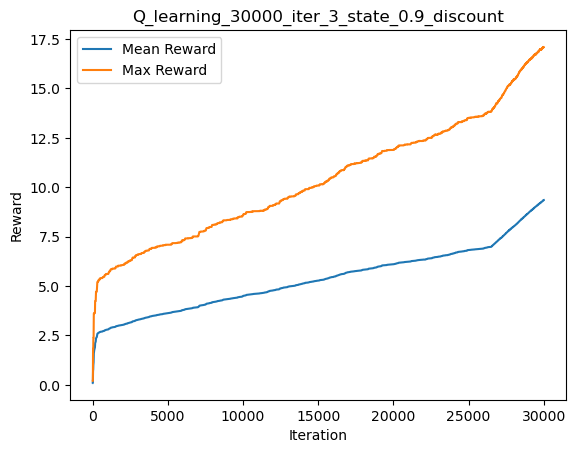

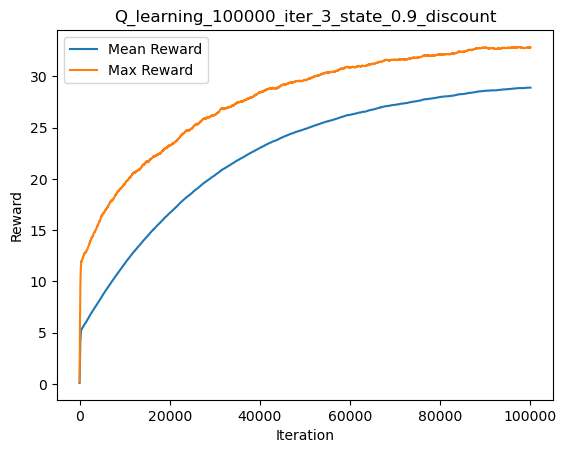

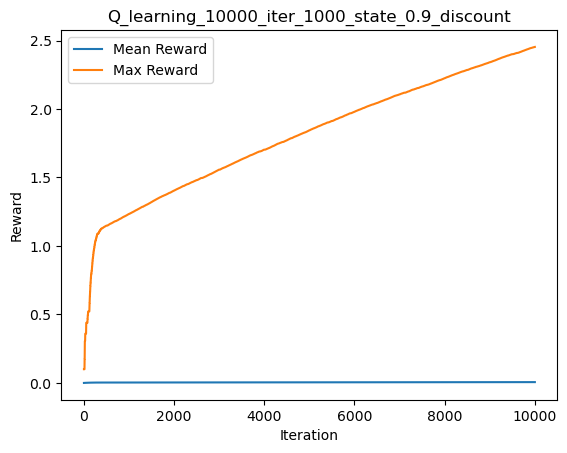

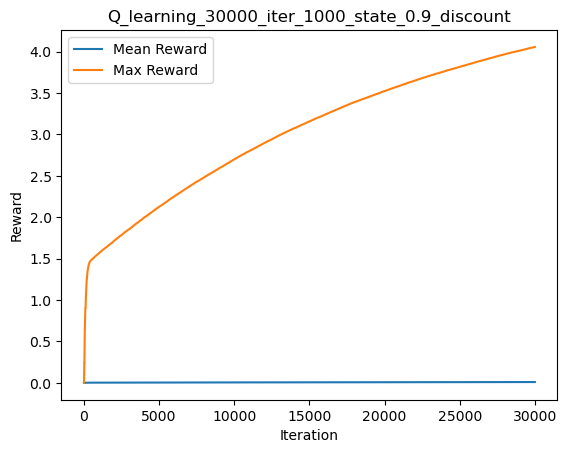

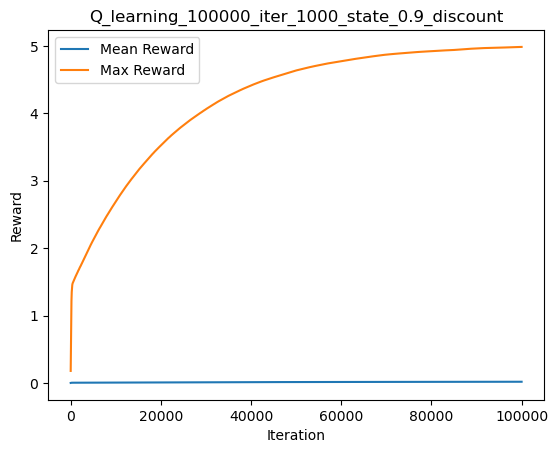

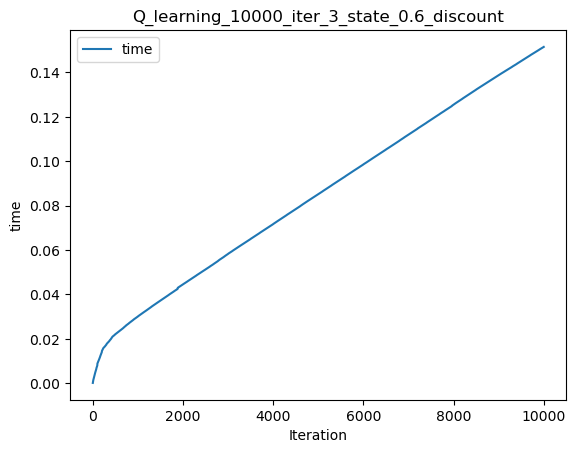

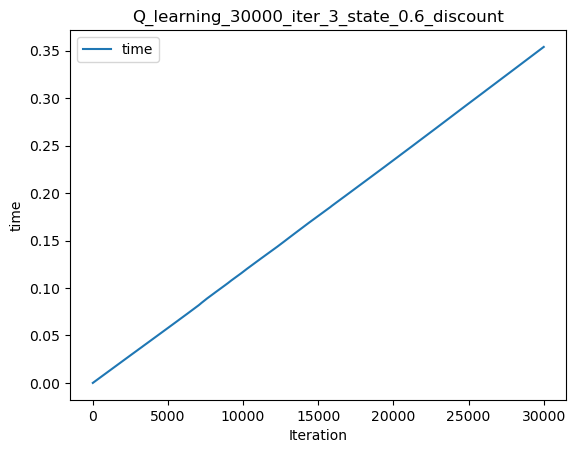

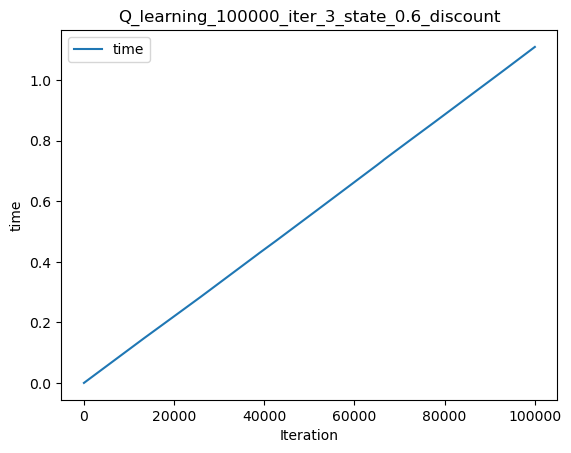

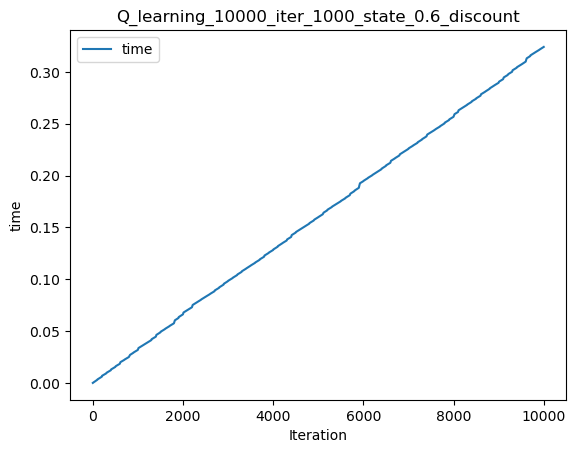

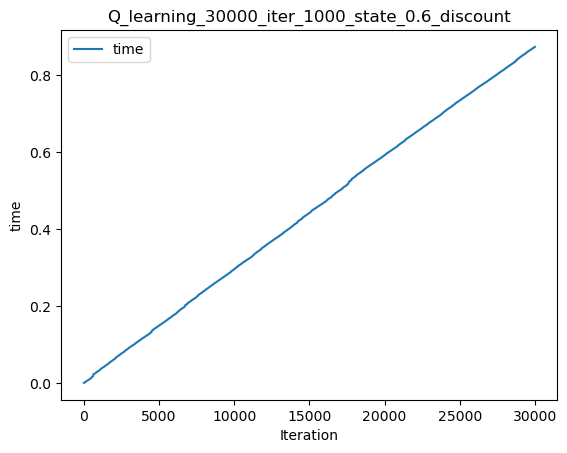

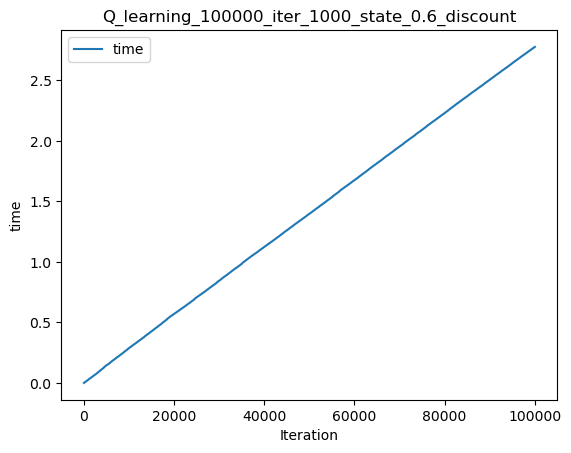

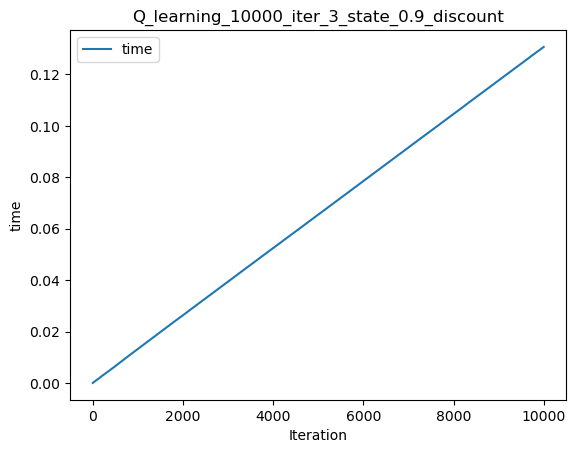

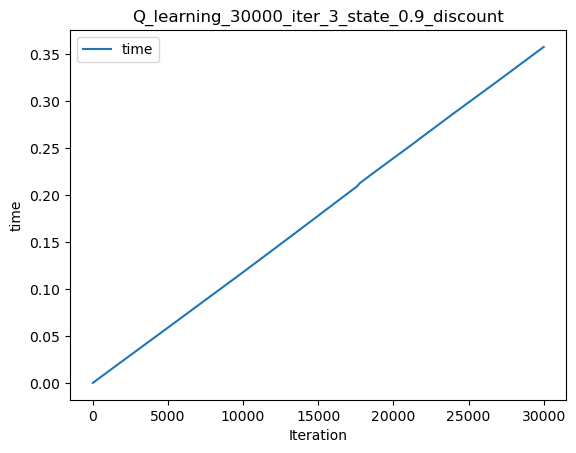

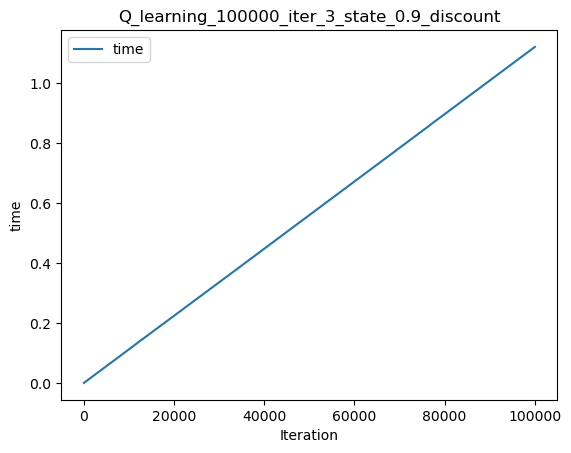

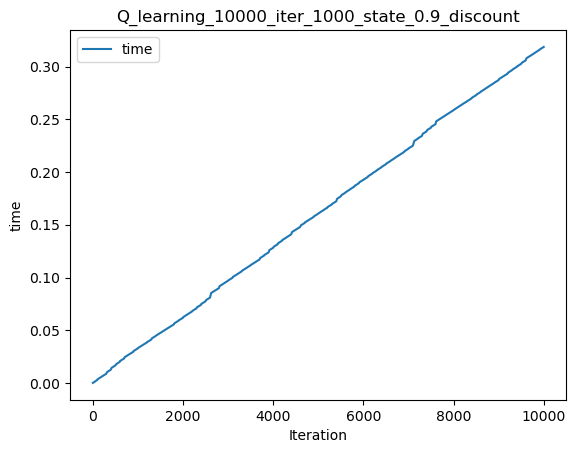

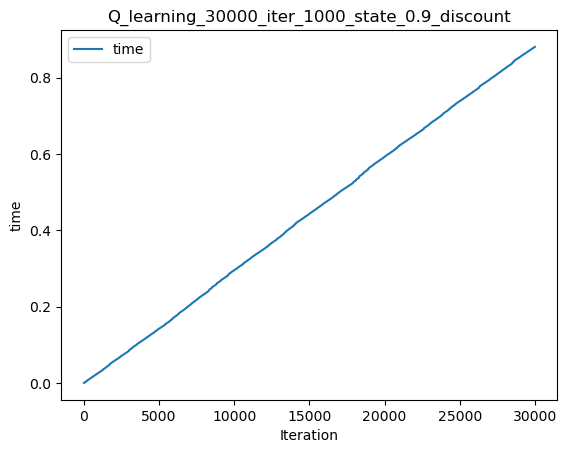

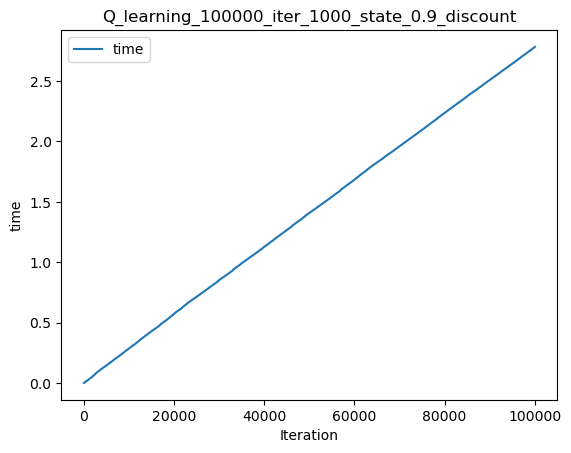

In [4]:
states = [3, 1000]
discounts = [0.6, 0.9]
n_iters = [10000, 30000, 100000]

# Q-Learning
ff_q_learner = lambda dict_args: mdp.QLearning(**dict_args)
ff_q_learning_results = q_learning_forest(ff_q_learner, states, discounts, n_iters, "Q_learning")

In [5]:
pd.DataFrame(
    {"exp_name": [e['exp_name'] for e in ff_q_learning_results],
     "iteration": [e['run_stats'][-1]['Iteration'] for e in ff_q_learning_results],
     "rewards": [e['run_stats'][-1]['Mean V'] for e in ff_q_learning_results],
     "time": [e['run_stats'][-1]['Time'] for e in ff_q_learning_results],
    }
)

,exp_name,iteration,rewards,time
0,Q_learning_10000_iter_3_state_0.6_discount,10000,2.792548,0.151483
1,Q_learning_30000_iter_3_state_0.6_discount,30000,5.518695,0.353837
2,Q_learning_100000_iter_3_state_0.6_discount,100000,1.591567,1.109918
3,Q_learning_10000_iter_1000_state_0.6_discount,10000,0.003204,0.324145
4,Q_learning_30000_iter_1000_state_0.6_discount,30000,0.004012,0.873234
5,Q_learning_100000_iter_1000_state_0.6_discount,100000,0.005396,2.776177
6,Q_learning_10000_iter_3_state_0.9_discount,10000,3.844165,0.130684
7,Q_learning_30000_iter_3_state_0.9_discount,30000,9.355182,0.357861
8,Q_learning_100000_iter_3_state_0.9_discount,100000,28.891440,1.121432
9,Q_learning_10000_iter_1000_state_0.9_discount,10000,0.005952,0.318664


In [14]:
pd.DataFrame(
    {"exp_name": [e['exp_name'] for e in fm_policy_iteration_results],
     "rewards": [e['run_stats'][-1]['Reward'] for e in fm_policy_iteration_results],
     "iter": [e['iterations'] for e in fm_policy_iteration_results],
     "time": [e['run_stats'][-1]['Time'] for e in fm_policy_iteration_results],
    }
)

,exp_name,rewards,iter,time
0,PI_iter_3_state_0.6_discount,9.076000,2,0.000352
1,PI_iter_1000_state_0.6_discount,8.809994,3,0.064708
2,PI_iter_3_state_0.9_discount,33.484000,2,0.000272
3,PI_iter_1000_state_0.9_discount,23.172434,10,0.156365


In [13]:
pd.DataFrame(
    {"exp_name": [e['exp_name'] for e in fm_value_iteration_results],
     "rewards": [e['run_stats'][-1]['Reward'] for e in fm_value_iteration_results],
     "iter": [e['iterations'] for e in fm_value_iteration_results],
     "time": [e['run_stats'][-1]['Time'] for e in fm_value_iteration_results],
    }
)

,exp_name,rewards,iter,time
0,VI_iter_3_state_0.6_discount,9.047158,11,0.000405
1,VI_iter_1000_state_0.6_discount,8.797055,11,0.004157
2,VI_iter_3_state_0.9_discount,32.953531,39,0.000623
3,VI_iter_1000_state_0.9_discount,23.089675,39,0.011341


One thing special about Q learning algorithm is that it does not use a stopping criteria, but run through a pre-set number of iterations regardless of the rewards (number of iterations is set to be 10,000, 50,000, and 100,000). Compared with the PI and VI methods, it take significantly more time, probably due to the significantly more iterations being run, whiles does not seem to generate as high of the reward value. Also, we observe that more iterations does not necessarily lead to greater reward, even in the scenario where reward is only positive. The discount value does not seem to matter much with this algorithm, as the time complexity and returned reward value for both discount rate at 0.6 and 0.9.

In general, Q learning algorithm did not perform as well as the other two approaches for the forest fire problem, as it takes more time to complete and returns less reward approach.

### 3.2 Forest Fire with Q Learning Algorithm

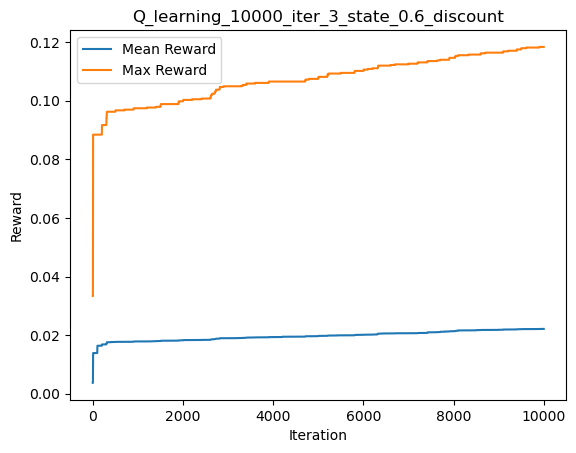

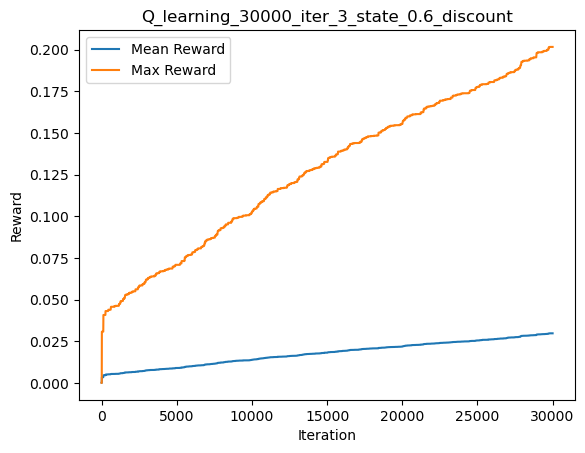

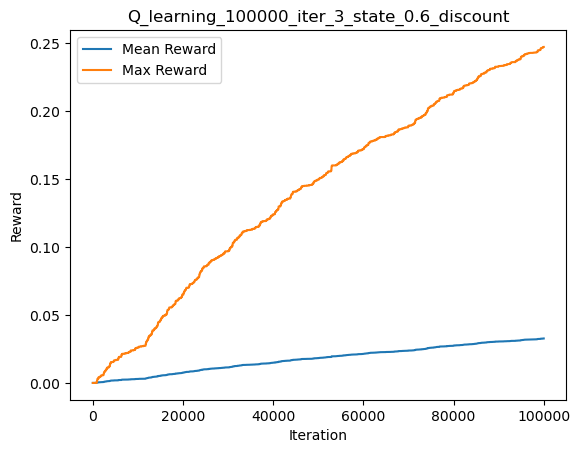

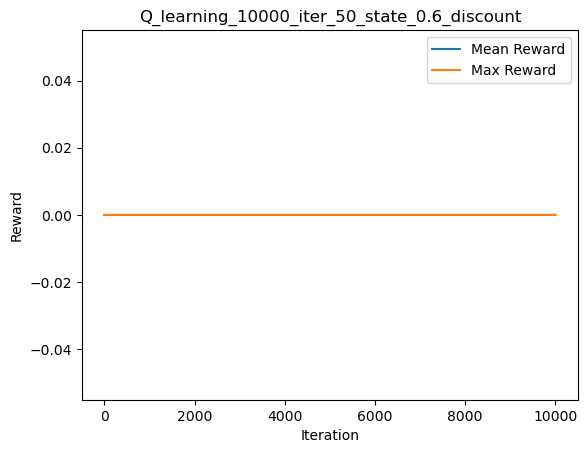

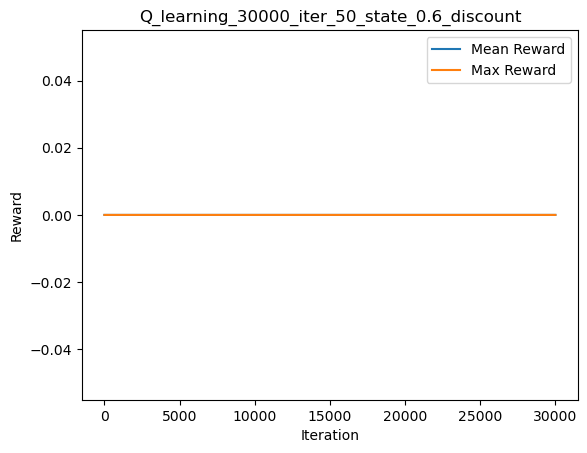

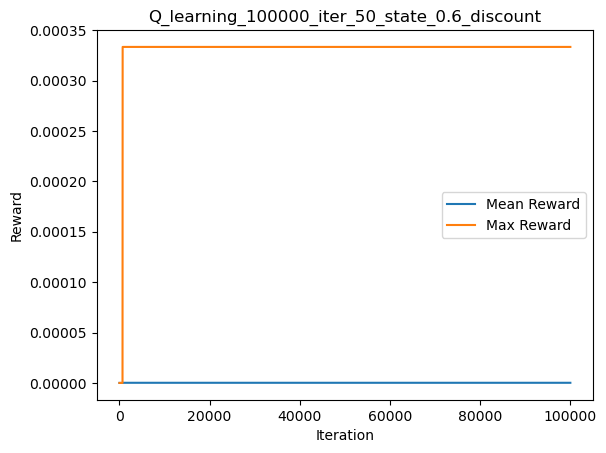

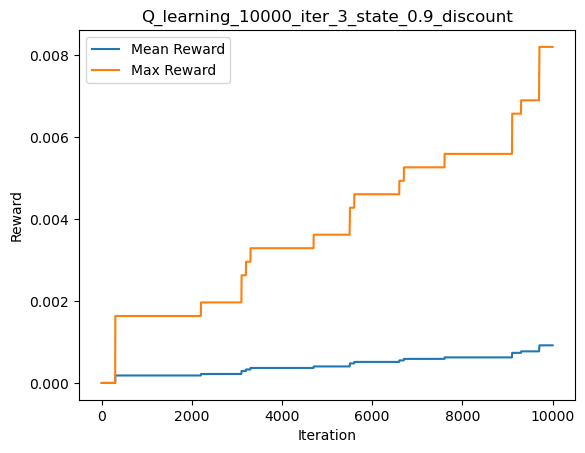

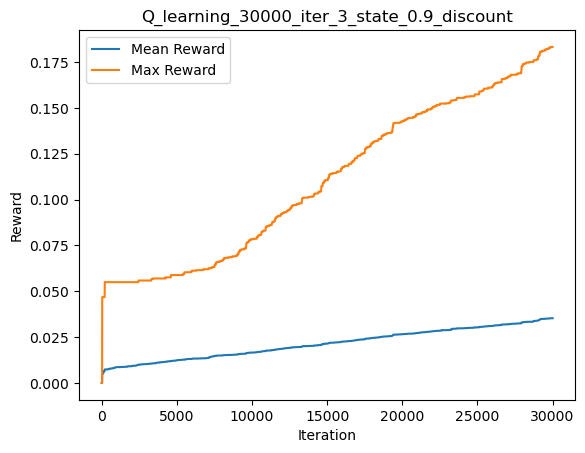

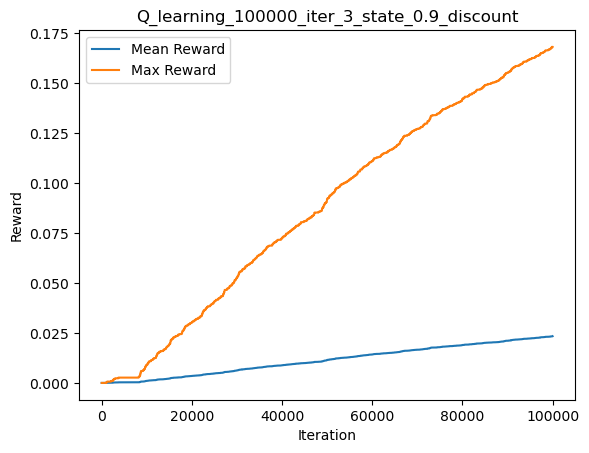

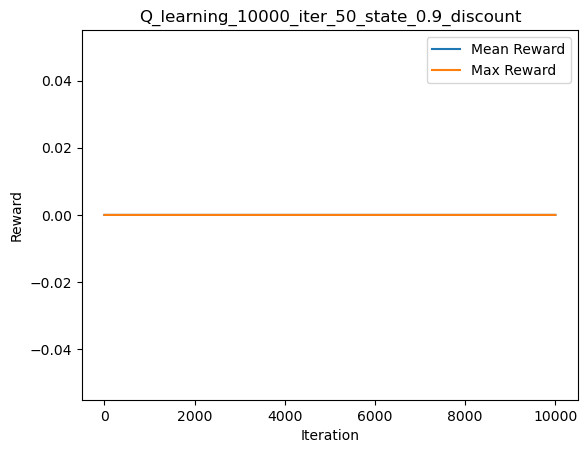

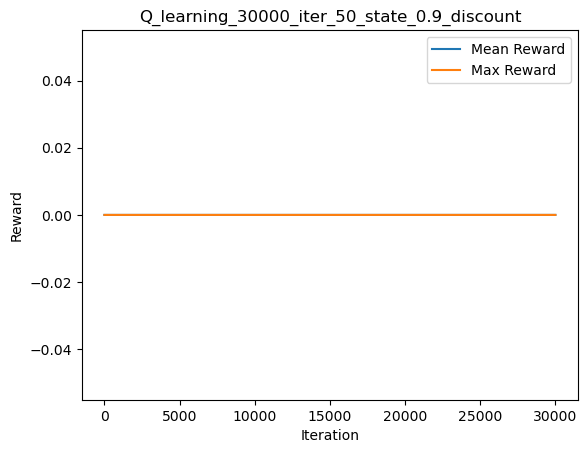

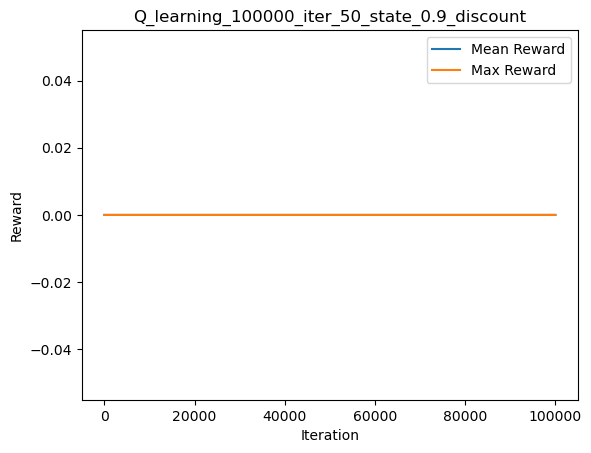

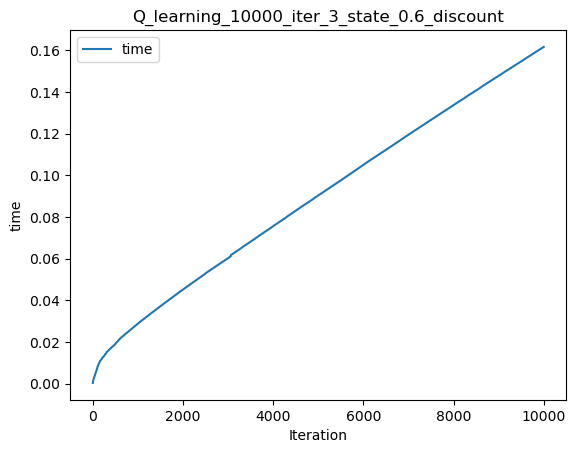

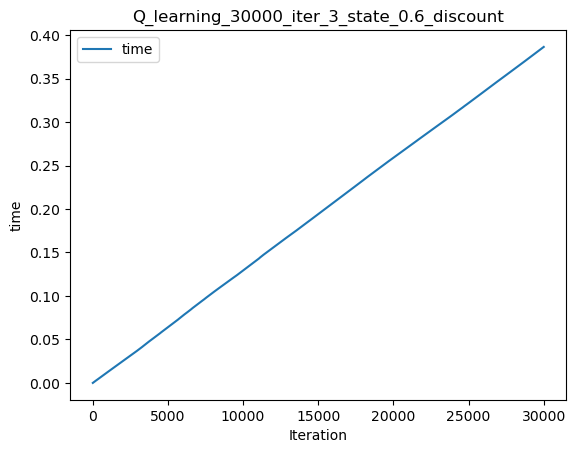

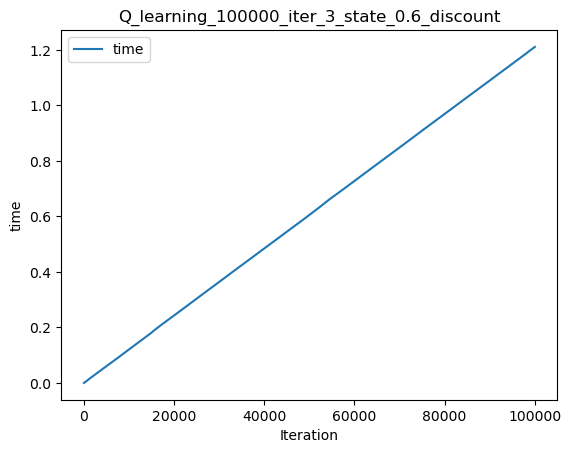

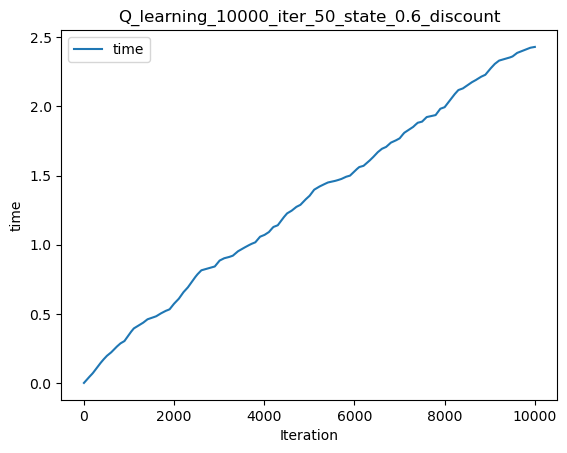

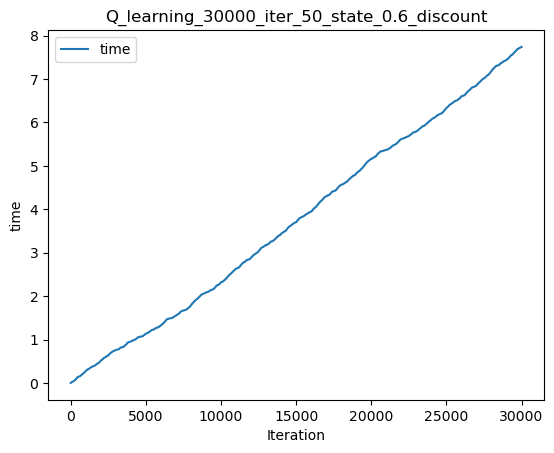

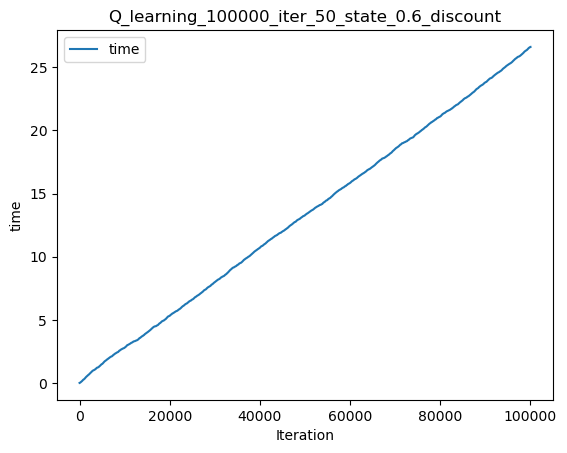

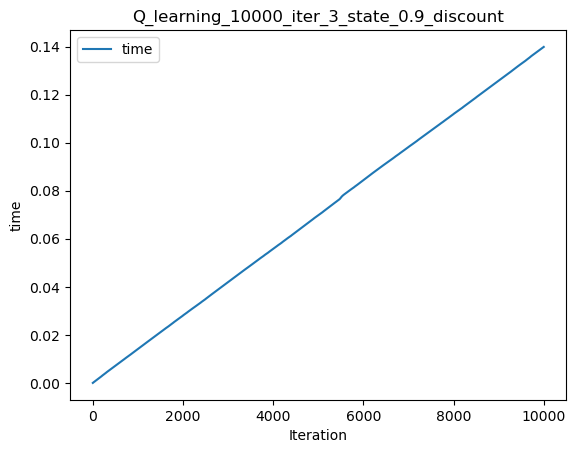

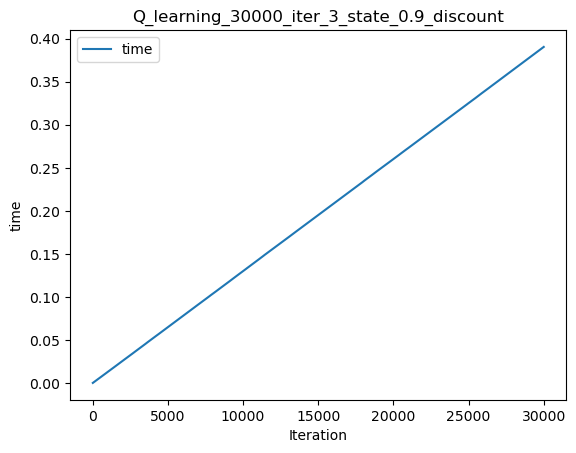

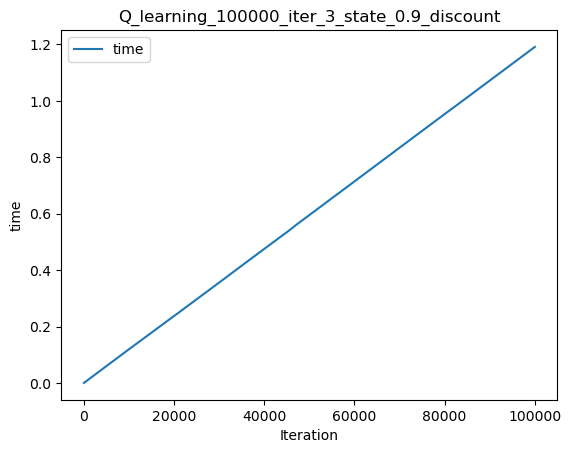

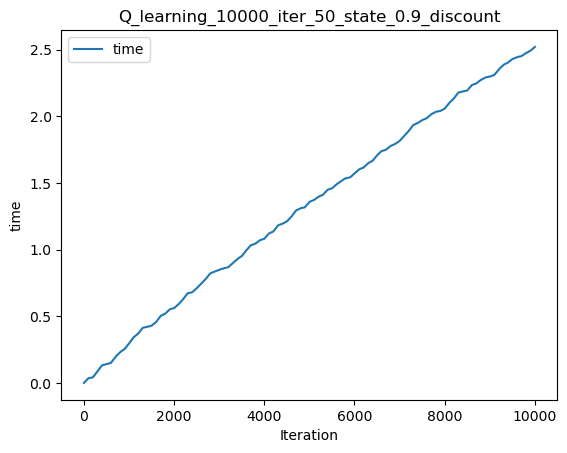

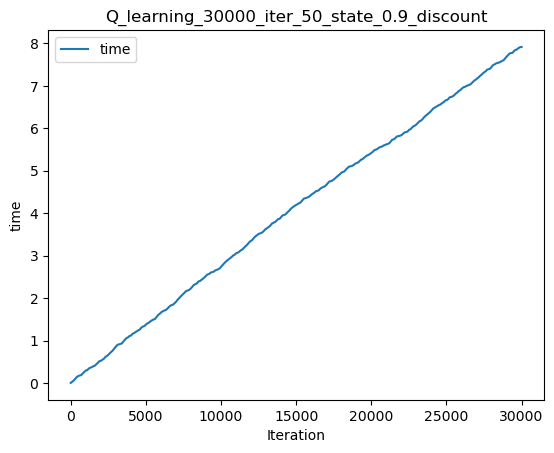

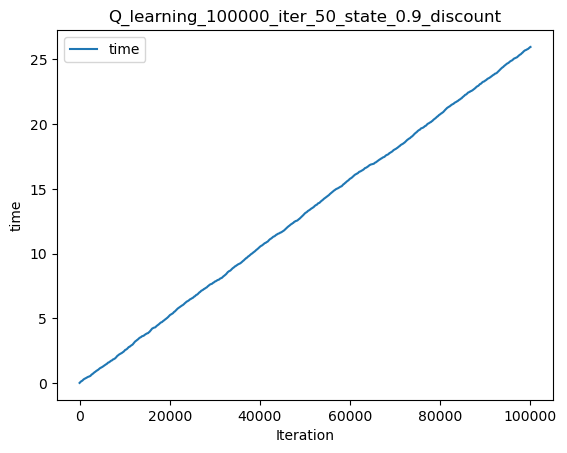

In [2]:
sizes = [3, 50]
discounts = [0.6, 0.9]
n_iters = [10000, 30000, 100000]

# Q-Learning
fl_q_learner = lambda dict_args: mdp.QLearning(**dict_args)
fl_q_learner_results = q_learning_lake(fl_q_learner, sizes, discounts, n_iters, "Q_learning")

In [3]:
pd.DataFrame(
    {"exp_name": [e['exp_name'] for e in fl_q_learner_results],
     "iteration": [e['run_stats'][-1]['Iteration'] for e in fl_q_learner_results],
     "rewards": [e['run_stats'][-1]['Mean V'] for e in fl_q_learner_results],
     "time": [e['run_stats'][-1]['Time'] for e in fl_q_learner_results],
    }
)

,exp_name,iteration,rewards,time
0,Q_learning_10000_iter_3_state_0.6_discount,10000,2.212508e-02,0.161655
1,Q_learning_30000_iter_3_state_0.6_discount,30000,2.976192e-02,0.386334
2,Q_learning_100000_iter_3_state_0.6_discount,100000,3.273602e-02,1.210989
3,Q_learning_10000_iter_50_state_0.6_discount,10000,0.000000e+00,2.430555
4,Q_learning_30000_iter_50_state_0.6_discount,30000,0.000000e+00,7.740997
5,Q_learning_100000_iter_50_state_0.6_discount,100000,1.333333e-07,26.607632
6,Q_learning_10000_iter_3_state_0.9_discount,10000,9.181336e-04,0.139830
7,Q_learning_30000_iter_3_state_0.9_discount,30000,3.527528e-02,0.390449
8,Q_learning_100000_iter_3_state_0.9_discount,100000,2.333556e-02,1.191282
9,Q_learning_10000_iter_50_state_0.9_discount,10000,0.000000e+00,2.520772


In [11]:
pd.DataFrame(
    {"exp_name": [e['exp_name'] for e in fl_policy_iteration_results],
     "rewards": [e['run_stats'][-1]['Reward'] for e in fl_policy_iteration_results],
     "iter": [e['iterations'] for e in fl_policy_iteration_results],
     "time": [e['run_stats'][-1]['Time'] for e in fl_policy_iteration_results],
    }
)

,exp_name,rewards,iter,time
0,PI_iter_3_state_0.6_discount,0.454545,3,0.002658
1,PI_iter_50_state_0.6_discount,0.467060,50,5.788285
2,PI_iter_3_state_0.9_discount,0.701754,3,0.000471
3,PI_iter_50_state_0.9_discount,0.694684,500,58.455127


In [12]:
pd.DataFrame(
    {"exp_name": [e['exp_name'] for e in fl_value_iteration_results],
     "rewards": [e['run_stats'][-1]['Reward'] for e in fl_value_iteration_results],
     "iter": [e['iterations'] for e in fl_value_iteration_results],
     "time": [e['run_stats'][-1]['Time'] for e in fl_value_iteration_results],
    }
)

,exp_name,rewards,iter,time
0,VI_iter_3_state_0.6_discount,0.450560,6,0.000332
1,VI_iter_50_state_0.6_discount,0.463787,6,0.021355
2,VI_iter_3_state_0.9_discount,0.712211,14,0.000272
3,VI_iter_50_state_0.9_discount,0.610836,11,0.039236


Here, for the frozen lake problem, we also observed a significantly poorer performance, compared with the PI and VI methods. It take significantly more time than value iteration method, probably due to the significantly more iterations being run, whiles does not seem to generate as high of the reward value. For policy iteration method, since it failed to converge properly for grid with size 50x50, the Q learning showed better performance in terms of processing time, but still a much lower reward. Similar to what is observed from the forest fire problem, the discount value does not seem to matter much with this algorithm, as the time complexity and returned reward value for both discount rate at 0.6 and 0.9.

However, different from the forest fire problem, we observe that more iterations seems to lead to greater reward in general. 

In general, Q learning algorithm did not perform as well as the other two approaches for the frozen lake problem either, as it takes more time to complete and returns less reward approach.